In [1]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping


ModuleNotFoundError: No module named 'keras'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_json (r'/content/drive/My Drive/news.json',lines=True)
df = df[['category','headline','short_description']]
df

,category,headline,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ..."
...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,Verizon Wireless and AT&T are already promotin...
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,"Afterward, Azarenka, more effusive with the pr..."
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...","Leading up to Super Bowl XLVI, the most talked..."
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,CORRECTION: An earlier version of this story i...


In [4]:
df = df.dropna(how = 'any')
df

,category,headline,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ..."
...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,Verizon Wireless and AT&T are already promotin...
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,"Afterward, Azarenka, more effusive with the pr..."
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...","Leading up to Super Bowl XLVI, the most talked..."
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,CORRECTION: An earlier version of this story i...


In [0]:
df['text'] = df['headline'] + df['short_description']

In [0]:
df = df[['category','text']]

In [7]:
df

,category,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...
...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M..."
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...


In [0]:
# Merging redundant categories 
df = df.replace({'category' : { 'ARTS & CULTURE' : 'ARTS', 'CULTURE & ARTS' : 'ARTS' }})
df = df.replace({'category' : { 'LATINO VOICES' : 'VOICES', 'BLACK VOICES' : 'VOICES', 'QUEER VOICES' : 'VOICES' }})
df = df.replace({'category' : { 'MONEY' : 'BUSINESS'}})
df = df.replace({'category' : { 'COLLEGE' : 'EDUCATION' }})
df = df.replace({'category' : { 'GREEN' : 'ENVIRONMENT' }})
df = df.replace({'category' : { 'TASTE' : 'FOOD & DRINK' }})
df = df.replace({'category' : { 'HEALTHY LIVING' : 'WELLNESS' }})
df = df.replace({'category' : { 'PARENTS' : 'PARENTING' }})
df = df.replace({'category' : { 'STYLE & BEAUTY' : 'STYLE' }})
df = df.replace({'category' : { 'THE WORLDPOST' : 'WORLD NEWS', 'WORLDPOST' : 'WORLD NEWS' }})

In [0]:
df = df.loc[df['category'].isin(['ARTS','BUSINESS','CRIME','EDUCATION','SPORTS'])]

In [0]:
df1 = df.category.value_counts()

In [0]:
df1 = pd.DataFrame({'category':df1.index, 'count':df1.values})

<BarContainer object of 5 artists>

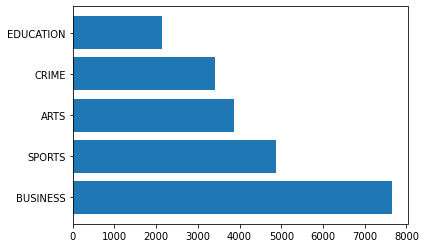

In [25]:
import matplotlib.pyplot as plt
plt.barh(df1['category'],df1['count'])

In [0]:
import numpy as np
no_of_cat = 2100
jumble = df.reindex(np.random.permutation(df.index))
ARTS = jumble[jumble['category'] == 'ARTS'][:no_of_cat]
BUSINESS = jumble[jumble['category'] == 'BUSINESS'][:no_of_cat]
EDUCATION = jumble[jumble['category'] == 'EDUCATION'][:no_of_cat]
CRIME = jumble[jumble['category'] == 'CRIME'][:no_of_cat]
SPORTS = jumble[jumble['category'] == 'SPORTS'][:no_of_cat]
merged = pd.concat([ARTS,BUSINESS,EDUCATION,CRIME,SPORTS], ignore_index=True)
#Shuffle the dataset
merged = merged.reindex(np.random.permutation(merged.index))
merged['LABEL'] = 0

In [12]:
merged.loc[merged['category'] == 'ARTS', 'LABEL'] = 0
merged.loc[merged['category'] == 'BUSINESS', 'LABEL'] = 1
merged.loc[merged['category'] == 'EDUCATION', 'LABEL'] = 2
merged.loc[merged['category'] == 'CRIME', 'LABEL'] = 3
merged.loc[merged['category'] == 'SPORTS', 'LABEL'] = 4
print(merged['LABEL'][:10])
labels = to_categorical(merged['LABEL'], num_classes=5)
print(labels[:10])
if 'category' in merged.keys():
    merged.drop(['category'], axis=1)

4406     2
7485     3
5183     2
1531     0
3748     1
5181     2
4819     2
5952     2
10290    4
9662     4
Name: LABEL, dtype: int64
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [13]:
n_most_common_words = 9000
max_len = 50
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(merged['text'].values)
sequences = tokenizer.texts_to_sequences(merged['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=max_len)

Found 32994 unique tokens.


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X , labels, test_size=0.25, random_state=42)

In [0]:
epochs = 10
emb_dim = 100
batch_size = 50

In [16]:
model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 100)           900000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 50, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 980,905
Trainable params: 980,905
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 6300 samples, validate on 1575 samples
Epoch 1/10
6300/6300 [==============================] - 12s 2ms/step - loss: 1.5211 - acc: 0.2986 - val_loss: 1.3315 - val_acc: 0.4546
Epoch 2/10
6300/6300 [==============================] - 11s 2ms/step - loss: 1.1955 - acc: 0.4976 - val_loss: 1.0092 - val_acc: 0.6286
Epoch 3/10
6300/6300 [==============================] - 11s 2ms/step - loss: 0.8634 - acc: 0.6743 - val_loss: 0.7870 - val_acc: 0.7340
Epoch 4/10
6300/6300 [==============================] - 11s 2ms/step - loss: 0.6373 - acc: 0.7783 - val_loss: 0.6583 - val_acc: 0.7829
Epoch 5/10
6300/6300 [==============================] - 11s 2ms/step - loss: 0.4745 - acc: 0.8402 - val_loss: 0.6055 - val_acc: 0.8102
Epoch 6/10
6300/6300 [==============================] - 11s 2ms/step - loss: 0.3707 - acc: 0.8800 - val_loss: 0.5987 - val_acc: 0.8076
Epoch 7/10
6300/6300 [==============================] - 11s 2ms/step - loss: 0.3072 - acc: 0.9014 - val_loss: 0.5839 - val_acc: 0.8133
Epoch 8

In [20]:
accur = model.evaluate(X_train,y_train)
print('Training set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accur[0],accur[1]))

7875/7875 [==============================] - 4s 454us/step
Training set
  Loss: 0.178
  Accuracy: 0.952


In [18]:
print(history)

In [19]:
accur = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accur[0],accur[1]))

2625/2625 [==============================] - 1s 424us/step
Test set
  Loss: 0.682
  Accuracy: 0.807


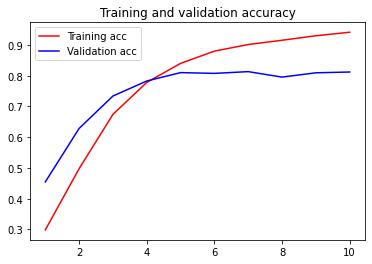

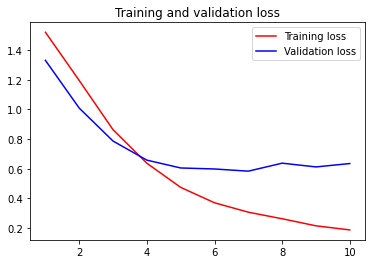

In [21]:
# Trainig-Testing Plot
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.show()

In [26]:
#confusion matrix
from sklearn.metrics import confusion_matrix
predicted = model.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test.argmax(axis=1), predicted.argmax(axis=1)))

from IPython.display import display
pd.options.display.max_columns = None
display(cm)

,0,1,2,3,4
0,432,42,23,9,20
1,34,402,53,13,15
2,36,51,400,15,17
3,20,24,14,438,25
4,36,16,18,25,447
